In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot defaults
sns.set()                       # sets default plot style
sns.set_context("paper")        # sets default plot context
plt.rc('figure', figsize=(16,8))# sets default figure size
plt.rc('font', size=16)         # controls default text sizes
plt.rc('axes', titlesize=18)    # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc(['xtick', 'ytick'], labelsize=12)   # fontsize of the tick labels
plt.rc('legend', fontsize=14, title_fontsize= 14, loc='upper left')   # fontsize of the legend labels

# Read files with training dataset and cancer labels into pandas DataFrames
file = 'cardio_train.csv'
data = pd.read_csv(file, sep=';', header=0, index_col=0)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [3]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Convert 'age' units from days to years
data['age'] = np.floor(data['age'] / 365)

# Convert 'height' units from cm to m
data['height'] = data['height']/100

# Add column that calculates BMI (body mass index)
data['BMI'] = round((data['weight'] / data['height']**2), 1)

# Convert gender to categorical datatype and rename categories 'F' and 'M'
data.gender = data.gender.astype('category')
data['gender'].cat.rename_categories(['F', 'M'], inplace=True)

data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
0,50.0,M,1.68,62.0,110,80,1,1,0,0,1,0,22.0
1,55.0,F,1.56,85.0,140,90,3,1,0,0,1,1,34.9
2,51.0,F,1.65,64.0,130,70,3,1,0,0,0,1,23.5
3,48.0,M,1.69,82.0,150,100,1,1,0,0,1,1,28.7
4,47.0,F,1.56,56.0,100,60,1,1,0,0,0,0,23.0


In [5]:
data.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.643592,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.555311
std,6.766774,0.082101,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.092596
min,29.000000,0.550000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.500000
25%,48.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.900000
50%,53.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.400000
75%,58.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.200000
max,64.000000,2.500000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.700000


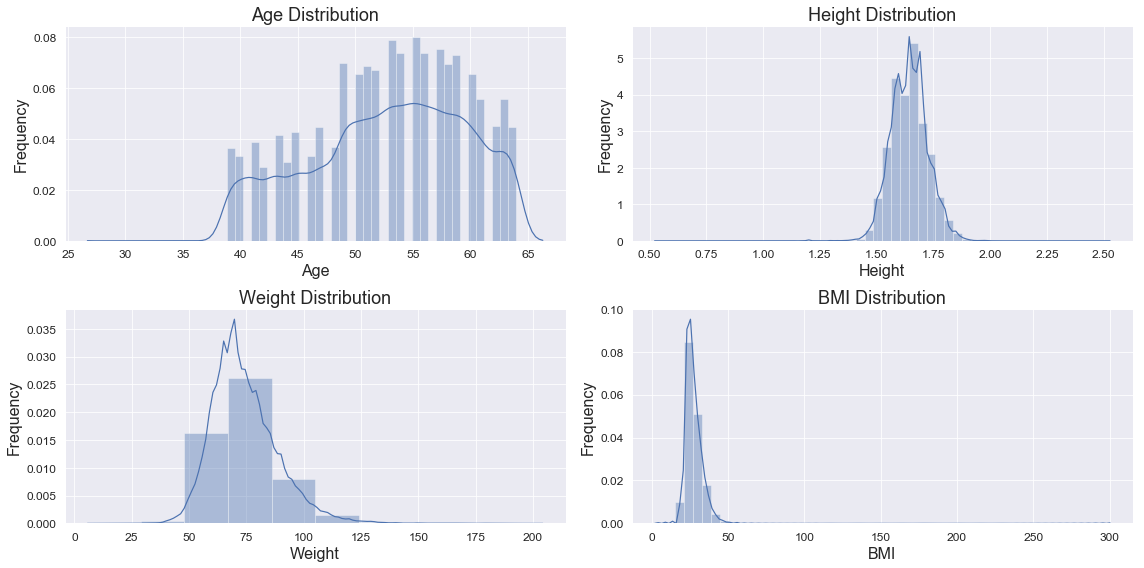

In [6]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(data.age)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(2,2,2)
sns.distplot(data.height)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")

plt.subplot(2,2,3)
sns.distplot(data.weight, bins=10)
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.subplot(2,2,4)
sns.distplot(data.BMI)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

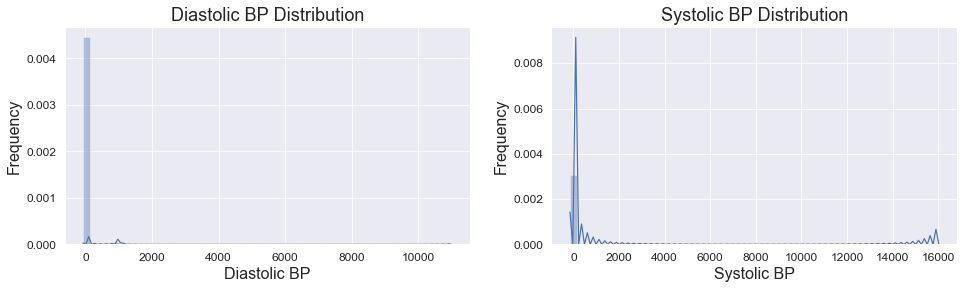

In [7]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.distplot(data.ap_lo)
plt.title("Diastolic BP Distribution")
plt.xlabel("Diastolic BP")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(data.ap_hi)
plt.title("Systolic BP Distribution")
plt.xlabel("Systolic BP")
plt.ylabel("Frequency")

plt.show()

In [8]:
data.sort_values(by=['ap_lo'], axis=0, ascending=False).head(15)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
61901,63.0,F,1.60,105.0,200,11000,1,1,0,0,1,1,41.0
97907,52.0,F,1.66,70.0,160,10000,2,1,0,0,1,1,25.4
3352,57.0,M,1.86,105.0,140,10000,1,1,0,0,1,1,30.4
34098,49.0,M,1.69,86.0,150,10000,2,2,0,1,1,1,30.1
62058,60.0,M,1.79,62.0,130,9800,1,1,0,0,1,0,19.4
9482,53.0,F,1.62,69.0,130,9100,1,1,0,0,1,1,26.3
47030,50.0,F,1.56,65.0,150,9011,2,2,0,0,1,1,26.7
17260,58.0,M,1.69,78.0,130,9011,1,1,1,1,1,1,27.3
22832,39.0,M,1.79,70.0,120,8500,1,1,0,0,1,0,21.8


In [9]:
data.sort_values(by=['ap_hi'], axis=0, ascending=False).head(15)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
58374,47.0,F,1.69,70.0,16020,80,1,1,0,0,0,1,24.5
66998,46.0,M,1.80,78.0,14020,90,1,1,0,0,1,1,24.1
36414,58.0,F,1.69,71.0,14020,80,3,3,0,0,1,1,24.9
36339,43.0,M,1.69,75.0,14020,80,2,1,0,0,1,1,26.3
67502,54.0,F,1.60,65.0,14020,90,1,1,0,0,1,0,25.4
79679,63.0,F,1.61,105.0,13010,80,1,1,0,0,0,0,40.5
79116,50.0,F,1.52,76.0,13010,80,2,2,0,0,1,1,32.9
11089,57.0,F,1.75,80.0,11500,90,1,1,0,0,1,1,26.1
73356,51.0,M,1.68,65.0,11020,80,1,1,0,0,1,1,23.0


In [10]:
# Filter out height outliers
df = data[(data.height >= 1.2) & (data.height <= 2)]

# Filter out abnormal blood pressure readings
df = df[(df.ap_hi < 300) & (df.ap_hi > 50) & (df.ap_lo > 20) & (df.ap_lo < 300)]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68730 entries, 0 to 99999
Data columns (total 13 columns):
age            68730 non-null float64
gender         68730 non-null category
height         68730 non-null float64
weight         68730 non-null float64
ap_hi          68730 non-null int64
ap_lo          68730 non-null int64
cholesterol    68730 non-null int64
gluc           68730 non-null int64
smoke          68730 non-null int64
alco           68730 non-null int64
active         68730 non-null int64
cardio         68730 non-null int64
BMI            68730 non-null float64
dtypes: category(1), float64(4), int64(8)
memory usage: 6.9 MB
None


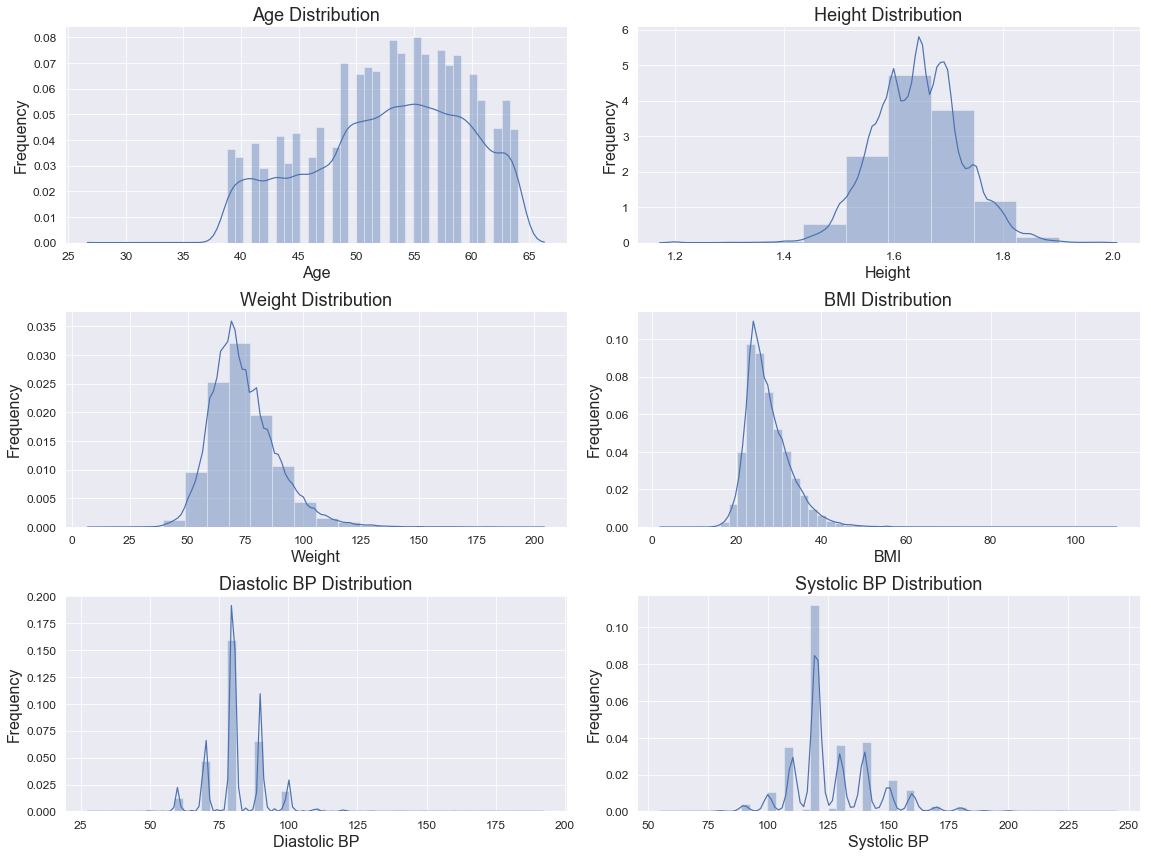

In [11]:
plt.figure(figsize=(16,12))

plt.subplot(3,2,1)
sns.distplot(df.age)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(3,2,2)
sns.distplot(df.height, bins=10)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")

plt.subplot(3,2,3)
sns.distplot(df.weight, bins=20)
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.subplot(3,2,4)
sns.distplot(df.BMI)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.subplot(3,2,5)
sns.distplot(df.ap_lo)
plt.title("Diastolic BP Distribution")
plt.xlabel("Diastolic BP")
plt.ylabel("Frequency")

plt.subplot(3,2,6)
sns.distplot(df.ap_hi)
plt.title("Systolic BP Distribution")
plt.xlabel("Systolic BP")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

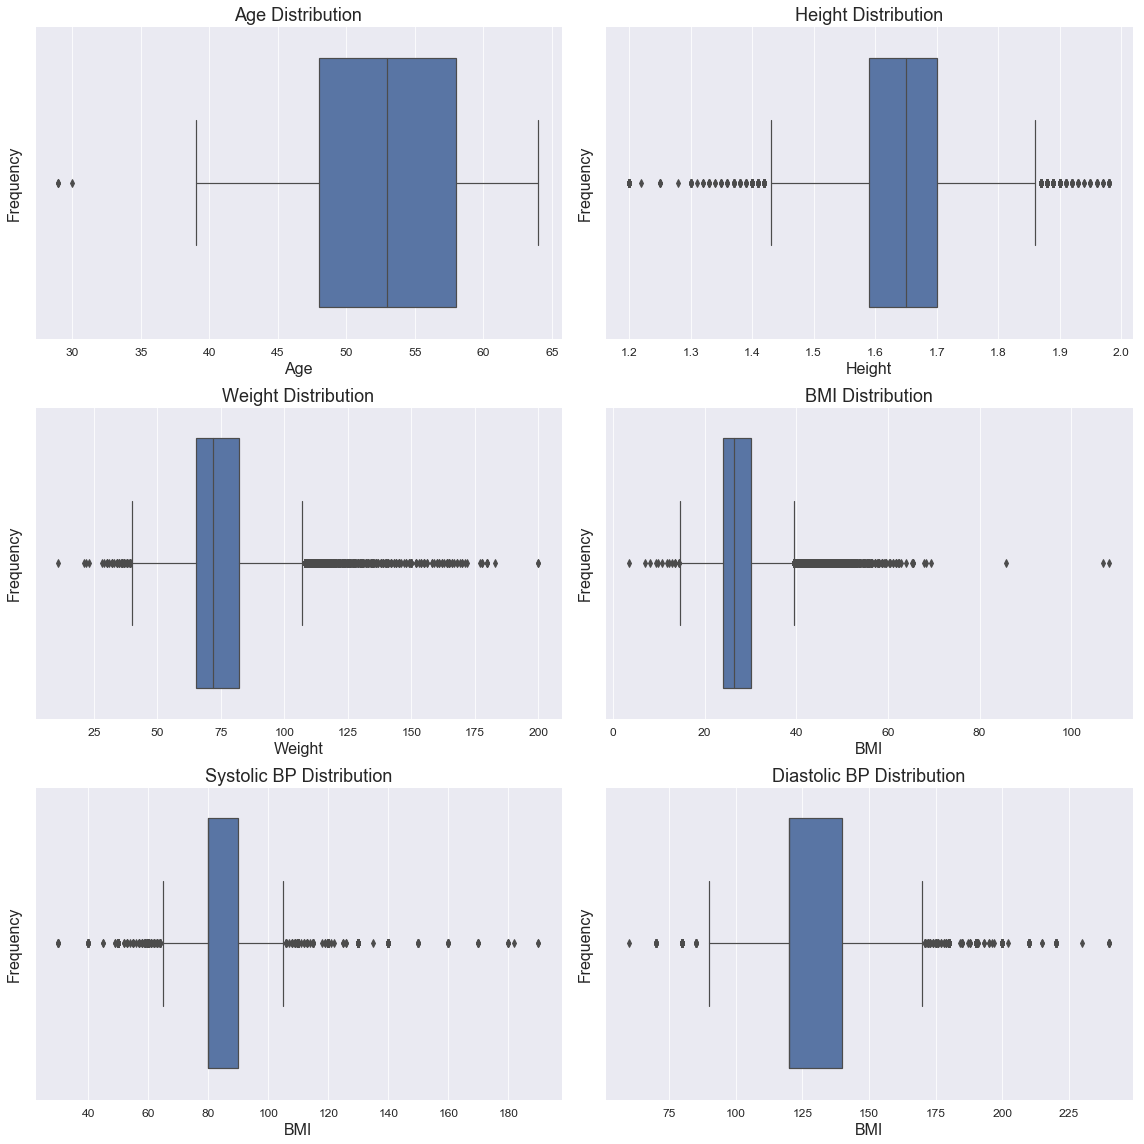

In [12]:
plt.figure(figsize=(16,16))

plt.subplot(3,2,1)
sns.boxplot(df.age)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(3,2,2)
sns.boxplot(df.height)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")

plt.subplot(3,2,3)
sns.boxplot(df.weight)
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.subplot(3,2,4)
sns.boxplot(df.BMI)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.subplot(3,2,5)
sns.boxplot(df.ap_lo)
plt.title("Systolic BP Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.subplot(3,2,6)
sns.boxplot(df.ap_hi)
plt.title("Diastolic BP Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

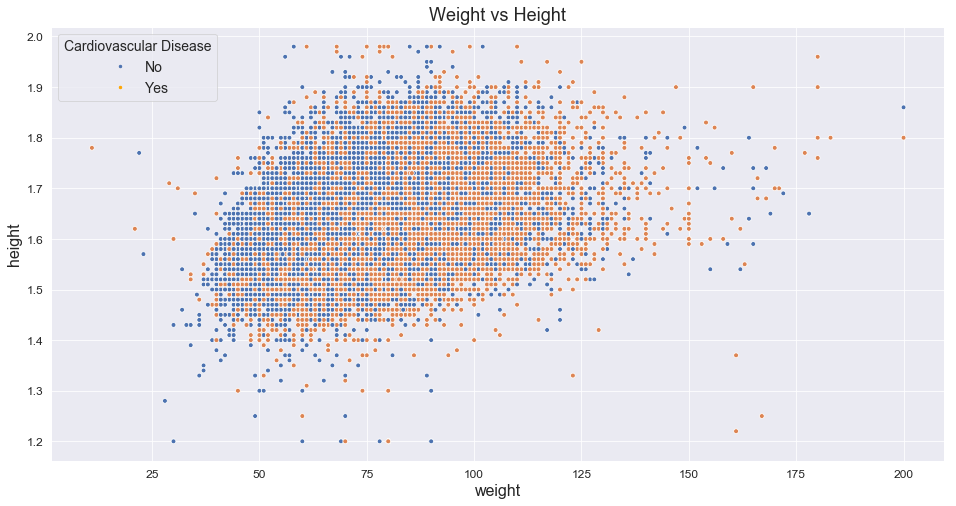

In [13]:
from matplotlib.lines import Line2D

plt.figure(figsize=(16,8))
sns.scatterplot(x=df.weight, y=df.height, hue=df.cardio, marker='o')
plt.title('Weight vs Height')
custom = [Line2D([], [], marker='.', color='b', linestyle='None'),
          Line2D([], [], marker='.', color='orange', linestyle='None')]
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease')
plt.show()

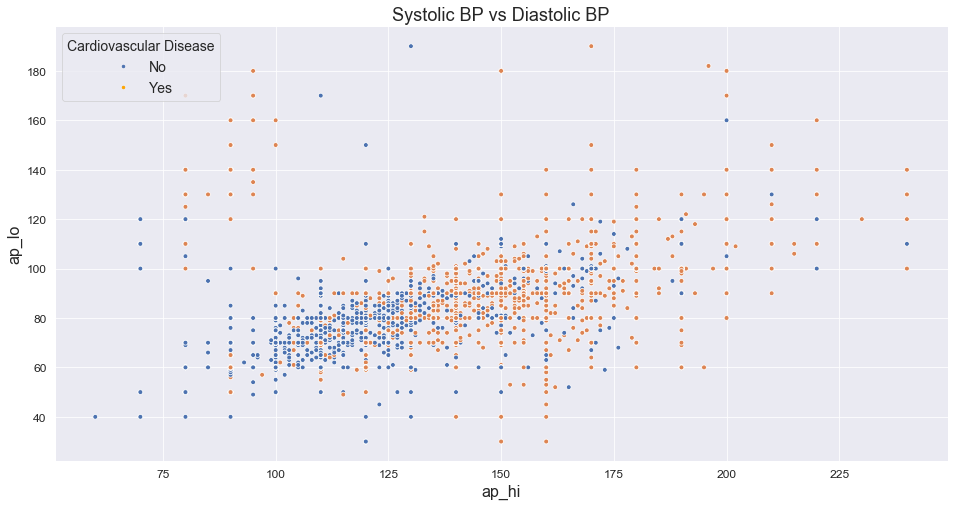

In [14]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df.ap_hi, y=df.ap_lo, hue=df.cardio, marker='o')
plt.title('Systolic BP vs Diastolic BP')
custom = [Line2D([], [], marker='.', color='b', linestyle='None'),
          Line2D([], [], marker='.', color='orange', linestyle='None')]
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease')
plt.show()

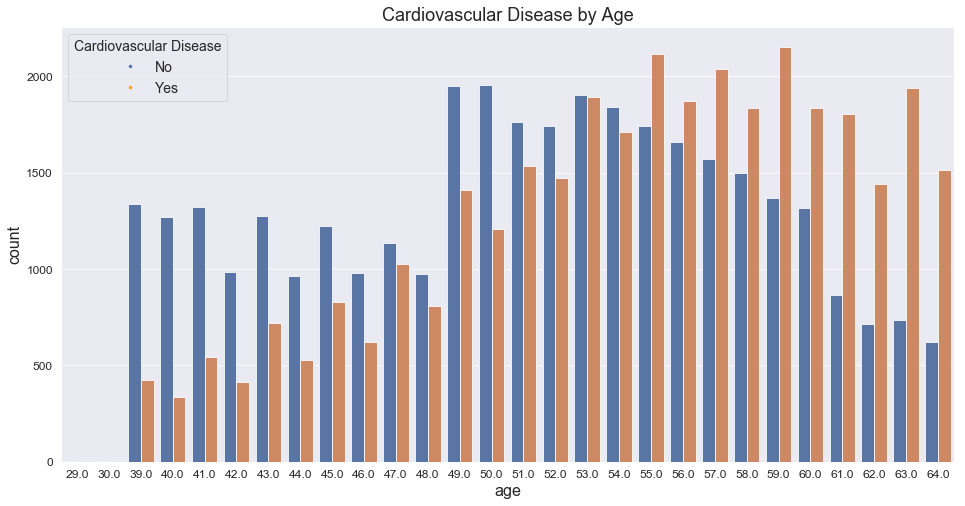

In [15]:
plt.figure(figsize=(16,8))
sns.countplot(x='age', hue='cardio', data=df)
plt.title('Cardiovascular Disease by Age')
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease')
plt.show()

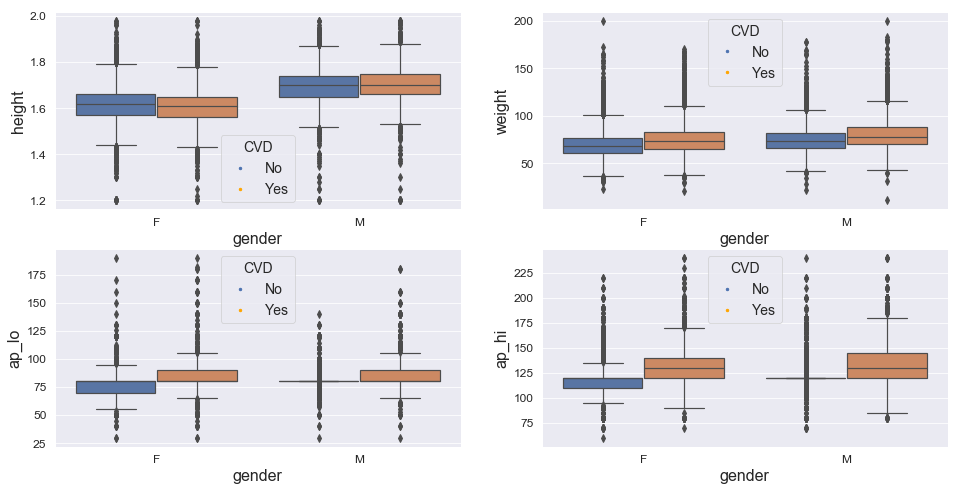

In [16]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.boxplot(x="gender", y="height", hue="cardio", data=df)
plt.legend(custom, ['No', 'Yes'], title='CVD', loc='best')

plt.subplot(2,2,2)
sns.boxplot(x="gender", y="weight", hue="cardio", data=df)
plt.legend(custom, ['No', 'Yes'], title='CVD', loc='best')

plt.subplot(2,2,3)
sns.boxplot(x="gender", y="ap_lo", hue="cardio", data=df)
plt.legend(custom, ['No', 'Yes'], title='CVD', loc='best')

plt.subplot(2,2,4)
sns.boxplot(x="gender", y="ap_hi", hue="cardio", data=df)
plt.legend(custom, ['No', 'Yes'], title='CVD', loc='best')

plt.show()

In [17]:
# Determine the number of patients with BMI greater or equal to 40
high_BMI = df[df.BMI >= 40].copy()
high_BMI.sort_values(by=['BMI'], inplace=True, ascending=False)
high_BMI.shape

(1786, 13)

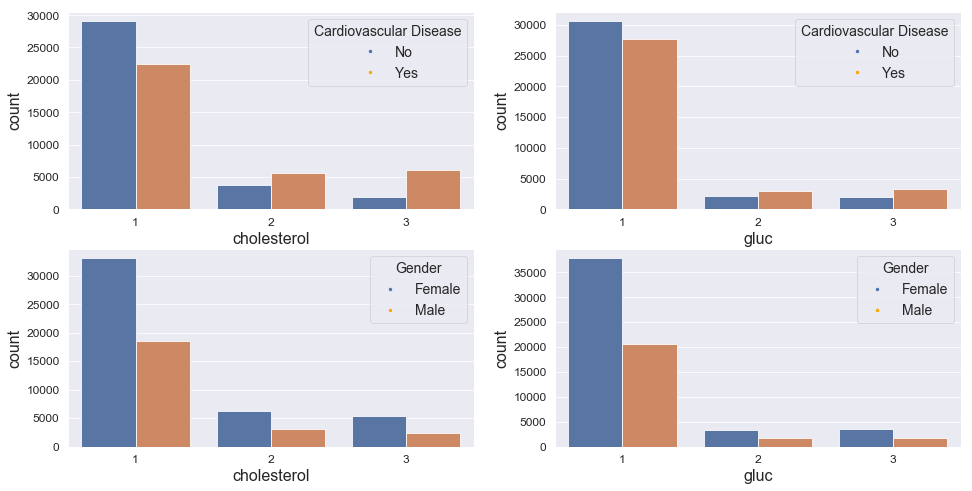

In [18]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease', loc='best')

plt.subplot(2,2,2)
sns.countplot(x='gluc', hue='cardio', data=df)
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease', loc='best')

plt.subplot(2,2,3)
sns.countplot(x='cholesterol', hue='gender', data=df)
plt.legend(custom, ['Female', 'Male'], title='Gender', loc='best')

plt.subplot(2,2,4)
sns.countplot(x='gluc', hue='gender', data=df)
plt.legend(custom, ['Female', 'Male'], title='Gender', loc='best')

plt.show()

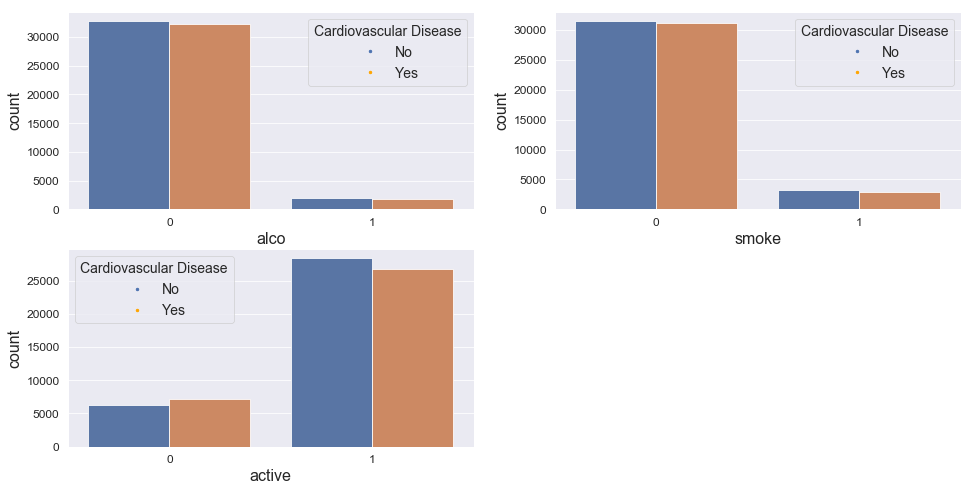

In [19]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.countplot(x='alco', hue='cardio', data=df)
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease', loc='best')

plt.subplot(2,2,2)
sns.countplot(x='smoke', hue='cardio', data=df)
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease', loc='best')

plt.subplot(2,2,3)
sns.countplot(x='active', hue='cardio', data=df)
plt.legend(custom, ['No', 'Yes'], title='Cardiovascular Disease', loc='best')

plt.show()

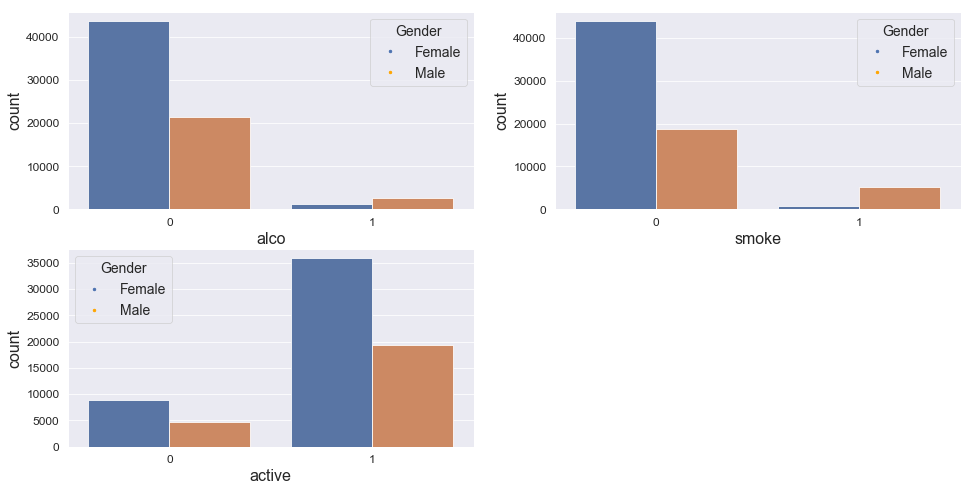

In [20]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.countplot(x='alco', hue='gender', data=df)
plt.legend(custom, ['Female', 'Male'], title='Gender', loc='best')

plt.subplot(2,2,2)
sns.countplot(x='smoke', hue='gender', data=df)
plt.legend(custom, ['Female', 'Male'], title='Gender', loc='best')

plt.subplot(2,2,3)
sns.countplot(x='active', hue='gender', data=df)
plt.legend(custom, ['Female', 'Male'], title='Gender', loc='best')

plt.show()

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)
    # x-data for the ECDF
    x = np.sort(data)
    # y-data for the ECDF
    y = np.arange(1, n+1)

    return x, y

CVD_weight = 
noCVD_weight = 

CVD_weight_x, CVD_weight_y = ecdf(CVD_weight)
noCVD_weight_x, noCVD_weight_y = ecdf(noCVD_weight)

plt.figure(figsize=(16, 8))
plt.plot(CVD_weight_x, CVD_weight_y, marker='.', linestyle='none', label='AML', color='red')
plt.plot(noCVD_weight_x, noCVD_weight_y, marker='.', linestyle='none', label='ALL', color='blue')
#ax = plt.yscale('log')
plt.xlabel('Weight')
plt.xticks(np.arange(-1.5, 1.75, step=0.25))
plt.ylabel('# of patients')
plt.title('ECDF of Weight by CVD status')
plt.legend()